# Evaluación - parte 1

In [1]:
import os
import geopandas as gpd
from  fiona import listlayers
import matplotlib.pyplot as plt
import pandas as pd 

## Exercise 1

    
### 1. Use two maps of points.

In [6]:
peru_health = "https://github.com/IntroSpatialDataScience/MiningGDF_Project1/raw/main/maps/peru_health_24891.gpkg"
ports = "https://github.com/IntroSpatialDataScience/MiningGDF_Project1/raw/main/data/UpdatedPub150.csv"

In [7]:
listlayers(ports)

['UpdatedPub150']

In [10]:
healthsites =gpd.read_file(peru_health,layer='healthsites')
portsFile =gpd.read_file(ports,layer='UpdatedPub150')

In [9]:
portsFile

,World Port Index Number,Region Name,Main Port Name,Alternate Port Name,UN/LOCODE,Country Code,World Water Body,Sailing Direction or Publication,Publication Link,Standard Nautical Chart,...,Supplies - Diesel Oil,Supplies - Aviation Fuel,Supplies - Deck,Supplies - Engine,Repairs,Dry Dock,Railway,Latitude,Longitude,geometry
0,7950,United States E Coast -- 6585,Maurer,,,United States,North Atlantic Ocean,U.S. Coast Pilot 2 - Atlantic Coast: Cape Cod ...,https://nauticalcharts.noaa.gov/publications/c...,12331,...,Yes,Unknown,Yes,Yes,Moderate,Unknown,Unknown,40.533333,-74.25,None
1,52235,Sulawesi -- 51970,Mangkasa Oil Terminal,,,Indonesia,Teluk Bone; Banda Sea; South Pacific Ocean,Sailing Directions Pub. 163 (Enroute) - Borneo...,https://msi.geo.nga.mil/api/publications/downl...,,...,No,Unknown,No,No,None,Unknown,Unknown,-2.733333,121.066667,None
2,47620,Madagascar -- 47350,Iharana,,,Madagascar,Indian Ocean,Sailing Directions Pub. 171 (Enroute) - East A...,https://msi.geo.nga.mil/api/publications/downl...,61560,...,No,Unknown,No,No,Emergency Only,Unknown,Unknown,-13.35,50,None
3,47360,Madagascar -- 47350,Andoany,,,Madagascar,Mozambique Channel; Indian Ocean,Sailing Directions Pub. 171 (Enroute) - East A...,https://msi.geo.nga.mil/api/publications/downl...,61420,...,No,Unknown,No,No,Emergency Only,Unknown,Unknown,-13.4,48.3,None
4,47020,Tanzania -- 46965,Chake Chake,,,Tanzania,Indian Ocean,Sailing Directions Pub. 171 (Enroute) - East A...,https://msi.geo.nga.mil/api/publications/downl...,61200,...,No,Unknown,No,No,Unknown,Unknown,Unknown,-5.25,39.766667,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3819,51560,Sarawak -- 51550,Kuching,,MY KCH,Malaysia,South China Sea; North Pacific Ocean,Sailing Directions Pub. 163 (Enroute) - Borneo...,https://msi.geo.nga.mil/api/publications/downl...,71350,...,Yes,Unknown,Yes,Yes,Limited,Small,Small,1.566667,110.35,None
3820,51635,Brunei -- 51610,Lumut,,BN LUM,Brunei,South China Sea; North Pacific Ocean,Sailing Directions Pub. 163 (Enroute) - Borneo...,https://msi.geo.nga.mil/api/publications/downl...,71330,...,Yes,Unknown,Unknown,Unknown,Emergency Only,Unknown,Unknown,4.716667,114.45,None
3821,48475,Iran -- 48410,Bandar-E Pars Terminal,Assaluyeh,,Iran,Persian Gulf; Indian Ocean,Sailing Directions Pub. 172 (Enroute) - Red Se...,https://msi.geo.nga.mil/api/publications/downl...,,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,27.533333,52.533333,None
3822,48264,United Arab Emirates -- 48260,Mina Saqr,Ras Al Khaimah,AE MSA,United Arab Emirates,Persian Gulf; Indian Ocean,Sailing Directions Pub. 172 (Enroute) - Red Se...,https://msi.geo.nga.mil/api/publications/downl...,62458,...,Yes,Unknown,Unknown,Unknown,Moderate,Unknown,Unknown,25.983333,56.05,None


In [13]:
#rename
portsFile.rename(columns={'Main Port Name':'portName'},inplace=True)
#subset
portsFile=portsFile.loc[:,['portName', 'Country Code','Latitude', 'Longitude']]

In [15]:
#spatial points (unprojected)
seaports=gpd.GeoDataFrame(data=portsFile.copy(),
                           geometry=gpd.points_from_xy(portsFile.Longitude,
                                                       portsFile.Latitude), 
                          crs=4326)# notice it is unprojected

In [18]:
seaports[seaports['Country Code']=='Peru']

,portName,Country Code,Latitude,Longitude,geometry
919,La Pampilla Oil Terminal,Peru,-11.933333,-77.133333,POINT (-77.13333 -11.93333)
946,Iquitos,Peru,-3.75,-73.233333,POINT (-73.23333 -3.75000)
952,Chancay,Peru,-11.583333,-77.25,POINT (-77.25000 -11.58333)
991,Puerto Supe,Peru,-10.8,-77.75,POINT (-77.75000 -10.80000)
1004,Salaverry,Peru,-8.233333,-78.983333,POINT (-78.98333 -8.23333)
1502,Conchan Oil Terminal,Peru,-12.166667,-77,POINT (-77.00000 -12.16667)
1655,Bahia San Nicolas,Peru,-15.25,-75.233333,POINT (-75.23333 -15.25000)
1910,Punta Lobitos (Bahia De Huarmey),Peru,-10.1,-78.166667,POINT (-78.16667 -10.10000)
1976,Puerto De Chimbote,Peru,-9.083333,-78.616667,POINT (-78.61667 -9.08333)
1987,Pimental,Peru,-6.833333,-79.933333,POINT (-79.93333 -6.83333)


In [19]:
seaports_pe=seaports[seaports['Country Code']=='Peru'].copy()
seaports_pe

,portName,Country Code,Latitude,Longitude,geometry
919,La Pampilla Oil Terminal,Peru,-11.933333,-77.133333,POINT (-77.13333 -11.93333)
946,Iquitos,Peru,-3.75,-73.233333,POINT (-73.23333 -3.75000)
952,Chancay,Peru,-11.583333,-77.25,POINT (-77.25000 -11.58333)
991,Puerto Supe,Peru,-10.8,-77.75,POINT (-77.75000 -10.80000)
1004,Salaverry,Peru,-8.233333,-78.983333,POINT (-78.98333 -8.23333)
1502,Conchan Oil Terminal,Peru,-12.166667,-77,POINT (-77.00000 -12.16667)
1655,Bahia San Nicolas,Peru,-15.25,-75.233333,POINT (-75.23333 -15.25000)
1910,Punta Lobitos (Bahia De Huarmey),Peru,-10.1,-78.166667,POINT (-78.16667 -10.10000)
1976,Puerto De Chimbote,Peru,-9.083333,-78.616667,POINT (-78.61667 -9.08333)
1987,Pimental,Peru,-6.833333,-79.933333,POINT (-79.93333 -6.83333)


In [20]:
# reset indexes
seaports_pe.reset_index(drop=True, inplace=True)

# reprojecting
seaports_pe_24891=seaports_pe_24891.to_crs(24891) # projected crs

In [41]:
healthsites.rename(columns={'X':'Longitude','Y':'Latitude'},inplace=True)
health_hospital = healthsites[healthsites.tipo=="hospital"]


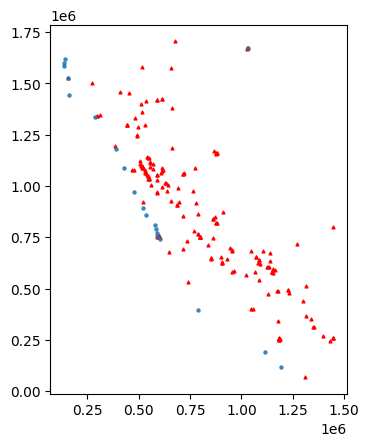

In [42]:
base=health_hospital.plot(color='red',marker="^",markersize=4)
seaports_pe_24891.plot(ax=base,alpha=0.8,markersize=5)
plt.show()

### 2. Compute the distance matrix for both maps.

In [27]:
seaports_pe_24891.head()

,portName,Country Code,Latitude,Longitude,geometry
0,La Pampilla Oil Terminal,Peru,-11.933333,-77.133333,POINT (589113.575 768847.884)
1,Iquitos,Peru,-3.75,-73.233333,POINT (1031485.913 1672619.329)
2,Chancay,Peru,-11.583333,-77.25,POINT (576836.026 807768.749)
3,Puerto Supe,Peru,-10.8,-77.75,POINT (523049.750 895072.078)
4,Salaverry,Peru,-8.233333,-78.983333,POINT (389344.884 1179950.206)


In [43]:
health_hospital.head()

,Longitude,Latitude,#meta +operator,localizacion,tipo,geometry
12,NaN,NaN,None,Hospital Rosa Sánchez de Santillán de Ascope,hospital,None
48,NaN,NaN,Ministerio de Salud del Perú,Hospital Vitarte,hospital,None
86,NaN,NaN,Gobierno Regional,Espinar,hospital,None
90,-78.499376,-7.164819,None,Clinica Angeles,hospital,POINT (443236.154 1297938.682)
115,NaN,NaN,Municipalidad Metropolitana de Lima,SISOL Salud Tacna,hospital,None


In [ ]:
# distance between  Hospital Clinica Angeles y 'Dtse / Gegua Oil Terminal' in km
largeAirports.iloc[0].geometry.distance(seaports_bra_5641.iloc[0].geometry)/1000

### 3. Select one row of the distance matrix, and plot the two points with the minimal distance on top of the country of your choosing.